In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it
import jupyter
from numpy import linalg
from scipy.sparse import coo_matrix
from tqdm.notebook import tqdm

from lsq_code import remove_outlier, create_vandermonde, solve_linear_LS, solve_linear_LS_gd, mnist_pairwise_LS

# Other possibly useful functions
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix

### Exercise 1

When $n=1$, we can fit a degree-$m$ polynomial by choosing $f_{j}(x)=x^{j-1}$ and $M=m+1$. 
In this case, it follows that $A_{i,j}=x_{i}^{j-1}$
and the matrix $A$ is called a Vandermonde matrix.
Write a function to create Vandermonde matrix **(5 pt)**

In [2]:
x = np.arange(1, 10)
create_vandermonde(x, 3)

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.],
       [  1.,   6.,  36., 216.],
       [  1.,   7.,  49., 343.],
       [  1.,   8.,  64., 512.],
       [  1.,   9.,  81., 729.]])

### Exercise 2

Write a function to solve least-square problem via linear algebra **(5 pt)**

Implementation hint: check `numpy.linalg.lstsq`.

Using the setup in the previous example, try fitting the points $(1,2),(2,3),(3,5),(4,7),(5,11),(6,13)$
to a degree-2 polynomial.

Print the mean squared error. **(5 pt)**

Plot this polynomial (for $x\in[0,7]$) along with the data points to see the quality of fit. **(5 pt)**

normal equation polynomial fit is 0.2321 x^2 + 0.6893 x^1 + 0.9000
normal equation MSE is 0.1821


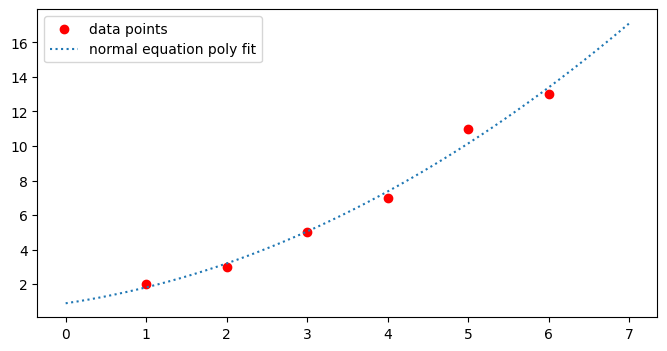

In [3]:
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([2, 3, 5, 7, 11, 13])
m = 2

# Create Vandermonde matrix A
A = create_vandermonde(x,m)

# Use linear algebra to solve least-squares problem and minimize || y - A z ||^2
z_hat = solve_linear_LS(A,y)

# Compute the mean squared error
f = A.dot(z_hat)
error = y - f
mse = 1/len(y) * np.inner(error,error)

# Generate x/y plot points for the fitted polynomial
xx = np.linspace(0, 7)
Vxx = create_vandermonde(xx,m) # Vandermonde
yy = Vxx.dot(z_hat)

plt.figure(figsize=(8, 4))
plt.scatter(x, y, color='red', label='data points')
plt.plot(xx, yy, linestyle='dotted',label='normal equation poly fit')
plt.legend()

poly1_expr = ' + '.join(['{0:.4f} x^{1}'.format(v, i) for i, v in enumerate(z_hat)][::-1])[:-4]
print('normal equation polynomial fit is {0}'.format(poly1_expr))
print('normal equation MSE is {0:.4f}'.format(mse))

### Exercise 3

Write a function to solve a least-squares problem via gradient descent. **(5 pt)**

Print the mean squared error. **(5 pt)**

Plot the resulting polynomial (for $x\in[0,7]$) along with previous polynomial and original data points to see the quality of fit. **(5 pt)**

gradient descent polynomial fit is 0.2310 x^2 + 0.7709 x^1 + 0.4882
gradient descent MSE is 0.2185
number of steps to achieve no larger than 20% normal equation MSE is 7083


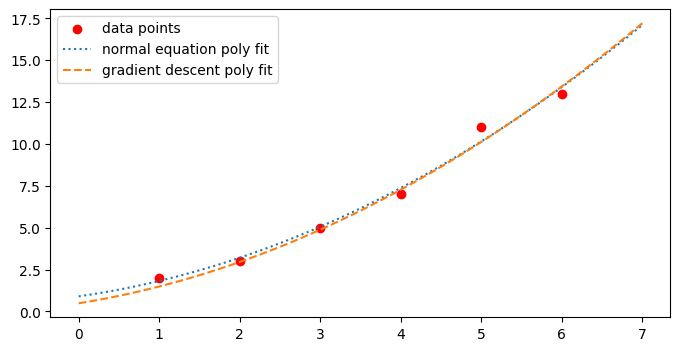

In [4]:
# Use gradient descent to solve least-squares problem and minimize || y - A z2 ||^2 
# Compute the mean squared error
step = 0.0002
z2_hat, mse2, T = solve_linear_LS_gd(A, y, step, 10000)

# Generate y plot points for the gd fitted polynomial
yy2 = Vxx.dot(z2_hat)

plt.figure(figsize=(8, 4))
plt.scatter(x, y, color='red', label='data points')
plt.plot(xx, yy, linestyle='dotted',label='normal equation poly fit')
plt.plot(xx, yy2, linestyle='dashed', label='gradient descent poly fit')
plt.legend()

poly2_expr = ' + '.join(['{0:.4f} x^{1}'.format(v, i) for i, v in enumerate(z2_hat)][::-1])[:-4]
print('gradient descent polynomial fit is {0}'.format(poly2_expr))
print('gradient descent MSE is {0:.4f}'.format(mse2))
print('number of steps to achieve no larger than 20% normal equation MSE is {}'.format(T))

#### MNIST

Read `mnist_train.csv`, create a dataframe with two columns, column `feature` contains all $x$ and column `label` contains all $y$.

Plot the first 30 images.

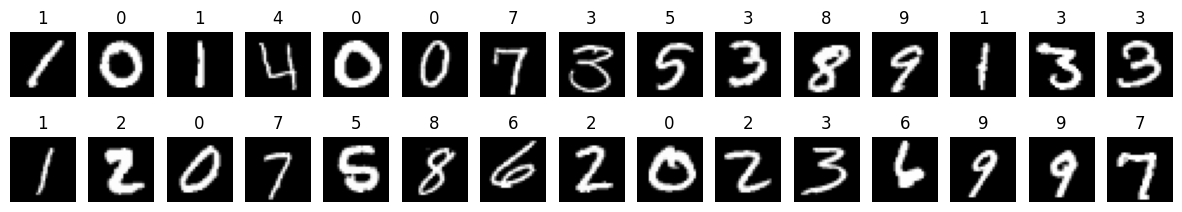

In [5]:
# read mnist csv file to a dataframe
df = pd.read_csv('mnist_train.csv')
# append feature column by merging all pixel columns
df['feature'] = df.apply(lambda row: row.values[1:], axis=1)
# only keep feature and label column
df = df[['feature', 'label']]
# display first 5 rows of the dataframe
df.head()

# Plot the first 30 images
plt.figure(figsize=(15, 2.5))
for i, row in df.iloc[:30].iterrows():
    x, y = row['feature'], row['label']
    plt.subplot(2, 15, i + 1)
    plt.imshow(x.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(y)

### Exercise 4

Write the function `extract_and_split` to extract the all samples labeled with digit $n$ and randomly separate fraction of samples into training and testing groups. **(10 pt)**

Implementation hint: check `sklearn.model_selection.train_test_split`.

Pairwise experiment for applying least-square to classify digit $a$ and digit $b$. 

Follow the given steps in the template and implement the `mnist_pairwise_LS` function for pairwise experiment **(15 pt)**

Possible implementation hint: check `sklearn.metrics.accuracy_score`, `sklearn.metrics.confusion_matrix`

c:\Users\tsofr\Documents\Python\586MP2\lsq_code.py:167: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  z_hat = np.linalg.lstsq(X_tr,y_tr)[0]


Pairwise experiment, mapping 0 to -1, mapping 1 to 1
training error = 0.29%, testing error = 0.95%
Confusion matrix:
 [[2048   18]
 [  24 2318]]


array([0.00294918, 0.00952813])

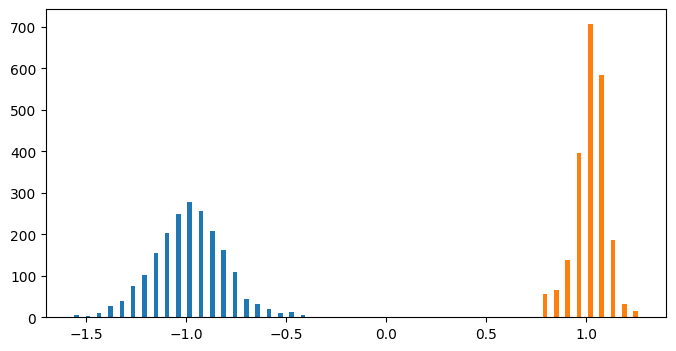

In [6]:
# Pairwise experiment for LSQ to classify between 0 and 1
mnist_pairwise_LS(df, 0, 1, verbose=True)

### Exercise 5

Repeat the above problem for all pairs of digits. For each pair of digits, report the classification error rates for the training and testing sets. The error rates can be formatted nicely into a triangular matrix.  Put testing error in the lower triangle and training error in the upper triangle.

The code is given here in order demonstrate tqdm.
Points awarded for reasonable values **(10 pt)**

In [7]:
# from tqdm.notebook import tqdm
num_trial, err_matrix = 1, np.zeros((10, 10))
for a, b in tqdm(it.combinations(range(10), 2), total=45):
    err_tr, err_te = np.mean([mnist_pairwise_LS(df, a, b) for _ in range(num_trial)], axis=0)
    err_matrix[a, b], err_matrix[b, a] = err_tr, err_te

print(np.round(err_matrix*100, 2))

  0%|          | 0/45 [00:00<?, ?it/s]

[[ 0.    0.29  0.89  0.42  0.22  0.83  0.9   0.14  0.83  0.19]
 [ 0.95  0.    0.99  8.32  0.14  0.54  0.18  0.64  1.88  1.15]
 [ 2.19  2.84  0.    1.97  0.75  1.08  0.94  0.86  1.58  0.65]
 [ 1.3  10.71  4.38  0.    0.28  2.28  0.4   0.94  3.5   1.24]
 [ 1.19  1.39  3.22  2.09  0.    0.56  0.63  0.92  0.27  2.15]
 [ 2.19  1.58  3.49  6.19  2.69  0.    1.46  0.29  2.44  0.83]
 [ 1.86  1.    3.39  1.77  2.48  3.66  0.    0.05  0.98  0.7 ]
 [ 1.24  1.85  3.15  2.31  2.95  1.49  0.94  0.    0.64  2.38]
 [ 1.51  3.98  3.74  6.92  1.89  4.76  2.63  1.84  0.    1.33]
 [ 1.63  2.59  2.84  3.21  5.18  2.78  2.31  5.87  3.15  0.  ]]


### Exercise 6

But, what about a multi-class classifier for MNIST digits? 
For multi-class linear classification with d classes, one standard approach is to learn a linear mapping $f \colon \mathbb{R}^n \to \mathbb{R}^d $ where the “$y$”-value for the $i$-th class is chosen to be the standard basis vector $ \underline{e}_i \in \mathbb{R}^d $. 
This is sometimes called one-hot encoding. 
Using the same $A$ matrix as before and a matrix $Y$, defined by $Y_{i,j}$ if observation $i$ in class $j$ and $Y_{i,j} = 0$ otherwise, we can solve for the coefficient matrix $Z \in \mathbb{R}^d$ coefficients .
Then, the classifier maps a vector $\underline{x}$ to class $i$ if the $i$-th element of $Z^T \underline{x}$ is the largest element in the vector. 

Follow the steps in the template and implement the multi-class classification experiment **(20 pt)**

In [8]:
# Randomly split into training/testing set
test_size = 0.5
n, m = len(df), int(len(df) * test_size)
perm = np.random.permutation(n)
tr, te = df.iloc[perm[m:]], df.iloc[perm[:m]]

# Construct the training set
X_train = tr.loc[:,'feature']
X_train = X_train.apply(lambda x: np.append(x,-1))
X_tr = np.stack(X_train.values)
y_train = tr.loc[:,'label']
y_tr = np.stack(y_train.values)
  
# Construct the testing set
X_test = te.loc[:,'feature']
X_test = X_test.apply(lambda x: np.append(x,-1))
X_te = np.stack(X_test.values)
y_test = te.loc[:,'label']
y_te = np.stack(y_test.values)

# Apply one-hot encoding to training labels
Y = np.zeros((len(y_tr),10))
Y_te = np.zeros((len(y_te),10))
I = np.eye(10) # identity matrix
for j, value in enumerate(y_tr):
    Y[j] = I[value]

for j, value in enumerate(y_te):
    Y_te[j] = I[value]


# Run least-square on training set
Z = np.linalg.lstsq(X_tr,Y)[0]

# Compute estimates and errors on training set
y_hat_train = X_tr @  Z
y_hat_tr = []
for item in y_hat_train:
    index = np.where(item==np.max(item))[0][0]
    item = I[index]
    y_hat_tr.append(item)

# compute err_tr
err = Y - y_hat_tr
counter = 0
for item in err:
    if linalg.norm(item,1) > 0:
        counter += 1
err_tr = counter / len(Y)


# Compute estimates and errors on training set
y_hat_test = X_te @ Z

y_hat_te = []
for item in y_hat_test:
    index = np.where(item==np.max(item))[0][0]
    item = I[index]
    y_hat_te.append(item)

err1 = Y_te - y_hat_te
counter_te = 0
for item in err1:
    if linalg.norm(item,1) > 0:
        counter_te += 1
err_te = counter_te / len(Y_te)

# convert y_hat_te to vector
y_hat_te_vec = []
for item in y_hat_te:
    index = np.where(item != 0)[0][0]
    y_hat_te_vec.append(index)
y_hat_te_vec = np.array(y_hat_te_vec)

print('training error = {0:.2f}%, testing error = {1:.2f}%'.format(100 * err_tr, 100 * err_te))
# Compute confusion matrix
cm = np.zeros((10, 10), dtype=np.int64)
for a in range(10):
    for b in range(10):
        cm[a, b] = ((y_te == a) & (y_hat_te_vec == b)).sum()
print('Confusion matrix:\n {0}'.format(cm))

C:\Users\tsofr\AppData\Local\Temp\ipykernel_12656\2855865160.py:33: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  Z = np.linalg.lstsq(X_tr,Y)[0]


training error = 13.79%, testing error = 15.50%
Confusion matrix:
 [[1986    5   10    9   13   22   23    2   18    3]
 [   1 2345   14    4   13    7    5    1   26    1]
 [  29   97 1662   67   47    7   77   28   48   14]
 [  16   70   72 1788   12   40   15   39   51   47]
 [   2   36   18    2 1763   21   15   11   15  122]
 [  60   31    9  182   53 1308   69   19   97   54]
 [  47   21   25    0   42   37 1875    0   15    0]
 [  11   71   24   18   71    1    1 1889    6  134]
 [  22  156   29   89   46   85   24    8 1518   63]
 [  23   19    5   38  133    4    0  201   18 1610]]
